<a href="https://colab.research.google.com/github/SubashiniB181203/Time-Series-Analysis-Lab/blob/main/221501145_TSA_exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***3. Check stationary of a time series data***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

In [3]:
# Load CSV file
file_path = "/content/sample_data/time_series_data.csv"  # Update with your file path
df = pd.read_csv(file_path, index_col=0, parse_dates=True)

In [4]:
# Assume time series column is the second column
ts = df.iloc[:, 0]

<ipython-input-5-f3704543ae46>:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(timeseries, regression='c', nlags="auto")


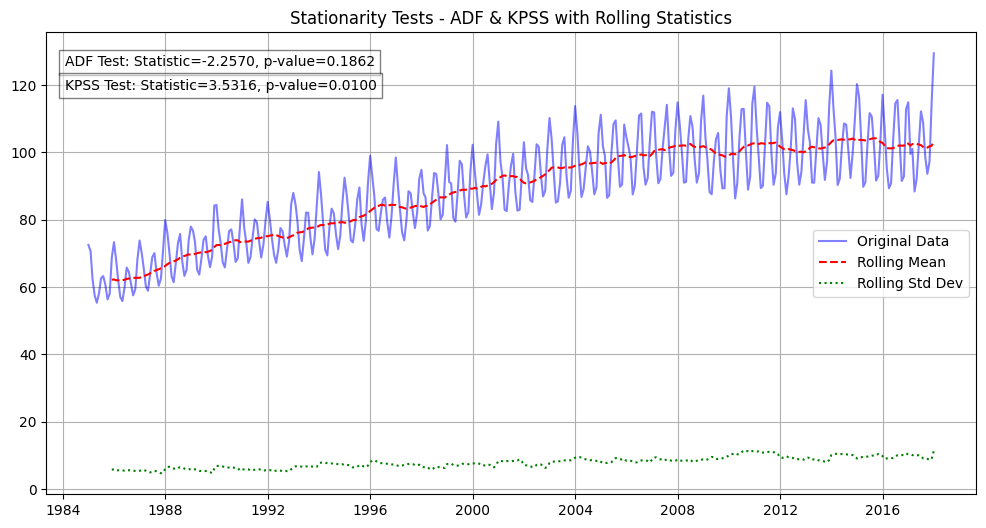

ADF Test:
Test Statistic = -2.2570, p-value = 0.1862
=> Not Stationary

KPSS Test:
Test Statistic = 3.5316, p-value = 0.0100
=> Not Stationary


In [5]:
# Function to check stationarity
def test_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Perform ADF test
    adf_test = adfuller(timeseries, autolag='AIC')
    adf_stat, adf_p = adf_test[0], adf_test[1]

    # Perform KPSS test
    kpss_test = kpss(timeseries, regression='c', nlags="auto")
    kpss_stat, kpss_p = kpss_test[0], kpss_test[1]

    # Plot the graph
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot Original Time Series
    ax.plot(timeseries, label="Original Data", color="blue", alpha=0.5)

    # Plot Rolling Mean and Std
    ax.plot(rolling_mean, label="Rolling Mean", color="red", linestyle="dashed")
    ax.plot(rolling_std, label="Rolling Std Dev", color="green", linestyle="dotted")

    # Annotate ADF and KPSS results
    adf_text = f"ADF Test: Statistic={adf_stat:.4f}, p-value={adf_p:.4f}"
    kpss_text = f"KPSS Test: Statistic={kpss_stat:.4f}, p-value={kpss_p:.4f}"

    ax.text(0.02, 0.95, adf_text, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax.text(0.02, 0.90, kpss_text, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    ax.set_title("Stationarity Tests - ADF & KPSS with Rolling Statistics")
    ax.legend()
    plt.grid()
    plt.show()

    # Print test results
    print("ADF Test:")
    print(f"Test Statistic = {adf_stat:.4f}, p-value = {adf_p:.4f}")
    print("=> Stationary" if adf_p < 0.05 else "=> Not Stationary")

    print("\nKPSS Test:")
    print(f"Test Statistic = {kpss_stat:.4f}, p-value = {kpss_p:.4f}")
    print("=> Stationary" if kpss_p > 0.05 else "=> Not Stationary")

# Run stationarity check
test_stationarity(ts)